  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 3**

---

# **Título do Projeto**

SÉRIE TEMPORAL: RELATÓRIO DE BILHETERIA DE OBRAS INFORMADAS PELAS EXIBIDORAS

In [20]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'NICOLAS DE SOUZA OCAMPOS, 10416091' #@param {type:"string"}
Aluno2 = 'ALANIS URQUISA DIAS MOREIRA, 10424448' #@param {type:"string"}
Aluno3 = 'MARIA EDUARDA DE LIMA, 10414867' #@param {type:"string"}
Aluno4 = 'MATHEUS PEREIRA FORTUNATO, 10424297' #@param {type:"string"}


# Imports das Bibliotecas

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import json
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
# Baseline SARIMAX sobre público mensal
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

# Introdução

O cinema, além de ser uma forma de entretenimento, exerce papel relevante na economia, na cultura e na vida urbana. As salas de cinema contribuem para a geração de empregos, movimentação econômica, oferta de lazer e democratização do acesso à cultura. Apesar dessa relevância, o Brasil ainda apresenta desigualdades no acesso ao cinema. Em diversas regiões, especialmente nas mais afastadas dos grandes centros urbanos, a presença de salas é reduzida ou inexistente. Esse cenário reforça a necessidade de compreender como o público se comporta ao longo do tempo e quais fatores influenciam a evolução do setor de exibição cinematográfica.

Diante desse contexto, a seguinte questão de pesquisa: como a análise de séries temporais pode auxiliar na compreensão da evolução do setor de exibição cinematográfica no Brasil, considerando variáveis como número de espectadores, localização das salas, desempenho de filmes nacionais e atuação das empresas exibidoras?

O objetivo geral deste trabalho é desenvolver um modelo de análise de séries temporais para avaliar a evolução do setor de exibição cinematográfica no Brasil a partir de dados públicos. Como objetivos específicos, destacam-se a identificação de padrões de comportamento do público, a análise de tendências e sazonalidades no consumo de cinema, o mapeamento da infraestrutura de exibição no território nacional, a avaliação da presença e desempenho das produções nacionais em relação às estrangeiras e a geração de indicadores e visualizações que subsidiem políticas culturais e estratégias de incentivo à indústria audiovisual. Além disso, busca-se contribuir para os Objetivos de Desenvolvimento Sustentável (ODS) 8, 9 e 11, ao relacionar cultura, desenvolvimento econômico, infraestrutura e cidades sustentáveis.

A justificativa para esta pesquisa está na possibilidade de transformar dados públicos em informações estratégicas para a cultura. Ao aplicar métodos estatísticos, é possível revelar tendências e desigualdades que, muitas vezes, não ficam claras apenas pela observação direta do setor. Esses resultados podem apoiar gestores públicos na formulação de políticas mais eficazes e orientar empreendedores e investidores em suas decisões. Do ponto de vista acadêmico, o trabalho contribui ao explorar o uso da análise de séries temporais aplicada à cultura, ampliando o conhecimento sobre a relação entre cinema, sociedade e desenvolvimento.

A metodologia adotada envolve o uso de dados públicos disponibilizados pelo Portal Brasileiro de Dados Abertos e organizados pela Agência Nacional do Cinema (ANCINE), por meio do documento denominado “Relatório de bilheteria diária de obras informadas pelas exibidoras”. O processo inclui a coleta, organização e análise dos dados, com a construção de séries temporais capazes de mostrar tendências e padrões. Para isso, são utilizadas ferramentas de programação e visualização disponíveis na linguagem Python, como as bibliotecas pandas, geopandas, matplotlib, plotly.express, seaborn, numpy e json.

A estrutura do trabalho será organizada em cinco capítulos, além desta introdução. O primeiro apresenta a revisão de literatura, com estudos sobre o setor cinematográfico, políticas culturais e técnicas de análise de séries temporais. O segundo descreve a metodologia de pesquisa. O terceiro expõe os resultados obtidos com as análises realizadas. O quarto discute esses resultados à luz do referencial teórico e dos objetivos propostos. Por fim, o quinto capítulo reúne as considerações finais, destacando as contribuições do estudo, suas limitações e sugestões para trabalhos futuros.


# Referencial Teórico

Na indústria cinematográfica, diferentes metodologias têm sido aplicadas para prever a arrecadação de bilheterias. Os modelos tradicionais de séries temporais continuam sendo utilizados, mas há também o uso crescente de técnicas de aprendizado de máquina e redes neurais. Essas abordagens variam conforme o objetivo, podendo analisar desde estágios anteriores à produção até períodos de pós-estreia, considerando diferentes níveis de detalhamento, como previsões por filme, por semana ou para o mercado nacional (Desmeules, 2001; Li e Liu, 2022).

Os modelos dinâmicos e bayesianos, por exemplo, têm sido usados para atualizar previsões semanais e compreender o comportamento de queda de receita ao longo do tempo, além de avaliar a competição entre filmes (Desmeules, 2001). De forma complementar, os modelos clássicos de séries temporais, como o ARIMA, desenvolvidos por Box e Jenkins (1976), representam um marco na previsão estatística, pois permitem estimar valores futuros com base em observações passadas. Esses métodos continuam sendo referência e servem como base para muitas abordagens modernas de previsão. Já os métodos de aprendizado de máquina, como SVM, Random Forest, XGBoost, LightGBM e CatBoost, são aplicados tanto em previsões de mercado agregado quanto em estimativas específicas por filme. Destaca-se o bom desempenho do SVM em previsões de mercado nacional ao utilizar fatores econômicos como o PIB (Li e Liu, 2022).

As técnicas de deep learning, como LSTM, Bi-LSTM e RNN, têm se mostrado adequadas para capturar dinâmicas complexas em séries temporais multivariadas de bilheteria e dados externos relacionados (Zheng, 2024; Byun et al., 2020). Além disso, estratégias híbridas, como a decomposição de sinais seguida de preditores otimizados, permitem lidar melhor com séries não lineares, instáveis ou com pequenas amostras, recombinando previsões após o processamento (Ni e Li, 2023).

Outra linha de pesquisa relevante são os modelos de ensemble e stacking, que combinam diferentes algoritmos para melhorar a precisão e a robustez das previsões, especialmente em cenários que envolvem muitas variáveis categóricas e textuais (Liao et al., 2020; Fu, 2024). Esses métodos demonstraram alto desempenho, principalmente em estágios iniciais da produção, quando informações como a presença de estrelas no elenco têm forte peso na previsão da demanda (Liao et al., 2020).

As aplicações práticas são diversas. Em nível de mercado nacional, estudos mostraram que a combinação de variáveis econômicas com algoritmos de aprendizado de máquina pode prever a arrecadação com baixo erro, mesmo em períodos longos de antecedência (Li e Liu, 2022). No contexto da pré-produção, pesquisas em análise de roteiros demonstraram que técnicas de processamento de linguagem natural, associadas a métodos estatísticos, ajudam a estimar o retorno sobre investimento e apoiar decisões de aprovação de projetos (Eliashberg, Hui e Zhang, 2007). Também se destacam os modelos baseados em redes de similaridade, que permitem identificar padrões de comportamento do público, como taxas de decaimento e picos de demanda, tornando as previsões mais robustas para novos lançamentos (Yahav, 2016).

No campo da economia criativa, o uso de séries temporais não se limita apenas ao mercado internacional. No Brasil, estudos do IBGE (2020) e da ANCINE (2025) reforçam a importância do uso de dados abertos para monitorar o setor audiovisual. Entre as principais vantagens desse tipo de análise estão a identificação de padrões sazonais e de longo prazo, além do apoio à tomada de decisões com base em evidências concretas. Contudo, também existem limitações, como a necessidade de séries históricas longas e consistentes e a influência de eventos externos inesperados, como ocorreu durante a pandemia da COVID-19.

# Diagrama de Solução

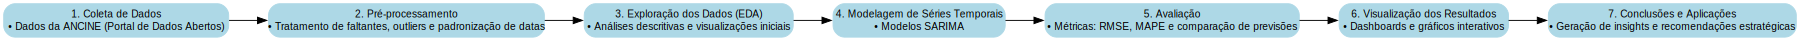

In [33]:
from graphviz import Digraph

# Criação do grafo
dot = Digraph("Pipeline_da_Solucao", format="png")
dot.attr(rankdir="LR", size="25", nodesep="0.6", ranksep="0.6")
dot.attr('node', shape='rectangle', style='rounded,filled', color='lightblue', fontname="Arial", fontsize="11")

# Etapas do pipeline
dot.node("1", "1. Coleta de Dados\n• Dados da ANCINE (Portal de Dados Abertos)")
dot.node("2", "2. Pré-processamento\n• Tratamento de faltantes, outliers e padronização de datas")
dot.node("3", "3. Exploração dos Dados (EDA)\n• Análises descritivas e visualizações iniciais")
dot.node("4", "4. Modelagem de Séries Temporais\n• Modelos SARIMA")
dot.node("5", "5. Avaliação\n• Métricas: RMSE, MAPE e comparação de previsões")
dot.node("6", "6. Visualização dos Resultados\n• Dashboards e gráficos interativos")
dot.node("7", "7. Conclusões e Aplicações\n• Geração de insights e recomendações estratégicas")

# Conexões entre as etapas
dot.edges(["12", "23", "34", "45", "56", "67"])

# Renderizar o diagrama
dot.render("diagrama_solucao", cleanup=True)
dot

# Descrição da Base de Dados

A base de dados utilizada neste projeto é disponibilizada pelo Portal Brasileiro de Dados Abertos, organizada pela Agência Nacional do Cinema (ANCINE), sob o título [“Relatório de bilheteria diária de obras informadas pelas exibidoras”](https://dados.gov.br/dados/conjuntos-dados/relatorio-de-bilheteria-diaria-de-obras-informadas-pelas-exibidoras). Esse conjunto reúne informações fornecidas diretamente pelas empresas exibidoras e atualizadas de forma contínua na plataforma oficial de dados abertos do governo.

O dataset contém registros diários de bilheteria das salas de cinema no Brasil, abrangendo o período de junho de 2014 até o presente momento (neste trabalho, até 15 de setembro de 2025). A base é atualizada diariamente, garantindo que os dados reflitam a dinâmica mais recente do setor.

O dataset apresenta a seguinte estrutura:
-   Data da Exibição: data em que a sessão ocorreu.
-   Sessão: identificação específica da sessão.
-   Título original da obra: nome original do filme.
-   Título no Brasil: título utilizado para exibição no mercado brasileiro.
-   CPB/ROE: código que identifica a obra (como Classificação de Produto Brasileiro / Registro de Obras Exibidas).
-   Áudio: tipo de áudio da exibição (por exemplo, original, dublado).
-   Legenda: tipo de legenda presente (se aplicável).
-   País: país de origem da obra.
-   Registro Sala: código identificador da sala de exibição.
-   Nome Sala: nome atribuído à sala específica.
-   Público: número de espectadores da sessão.
-   Registro do Grupo Exibidor: código do grupo de exibidor responsável.
-   Registro Exibidor: identificador da empresa exibidora.
-   Registro do Complexo: identificador do complexo (conjunto de salas).
-   Município Sala/Complexo: cidade onde a sala ou complexo está localizado.
-   UF Sala/Complexo: unidade federativa (estado) da sala ou complexo.
-   Razão Social Exibidora: razão social da empresa que exibe o filme.
-   CNPJ da Exibidora: número cadastrado da empresa exibidora.

Os dados são disponibilizados em arquivos organizados por mês e ano, nos seguintes formatos: CSV, JSON, ODT e XML, o que permite diferentes formas de processamento e análise.

### Carregamento dos Dados

O Portal Brasileiro de Dados Abertos disponibiliza os registros em vários arquivos separados por data. Para simplificar a análise exploratória, o primeiro passo é consolidar esses arquivos em um único arquivo .csv, reunindo todas as informações em uma base integrada.

In [2]:
# Caminho da pasta onde estão os arquivos
pasta = "bilheteria-diaria-obras-por-exibidoras-csv"

# Lista todos os arquivos .csv na pasta
arquivos = [f for f in os.listdir(pasta) if f.endswith(".csv")]

# Lê e concatena todos os CSVs
dataframes = []
for arquivo in arquivos:
    caminho = os.path.join(pasta, arquivo)
    df = pd.read_csv(caminho, sep=";")
    dataframes.append(df)

# Junta tudo em um único DataFrame
df_final = pd.concat(dataframes, ignore_index=True)
df_final.to_csv("bilheteria_unificado.csv", index=False)

print("Arquivos unidos com sucesso! Total de linhas:", len(df_final))

Arquivos unidos com sucesso! Total de linhas: 33986988


### Exploração inicial do Dataset

Após carregar e consolidar os dados, realizamos alguns passos para conhecer melhor a base:

-   df_final.columns: lista o nome de todas as colunas disponíveis no dataset.

In [23]:
df_final.columns

Index(['DATA_EXIBICAO', 'SESSAO', 'TITULO_ORIGINAL', 'TITULO_BRASIL',
       'CPB_ROE', 'AUDIO', 'LEGENDADA', 'PAIS_OBRA', 'REGISTRO_SALA',
       'NOME_SALA', 'PUBLICO', 'REGISTRO_GRUPO_EXIBIDOR', 'REGISTRO_EXIBIDOR',
       'REGISTRO_COMPLEXO', 'MUNICIPIO_SALA_COMPLEXO', 'UF_SALA_COMPLEXO',
       'RAZAO_SOCIAL_EXIBIDORA', 'CNPJ_EXIBIDORA'],
      dtype='object')

-   df_final.info(): apresenta uma visão geral da estrutura do dataset, incluindo o número de linhas, colunas, tipos de dados e a presença de valores nulos. No resultado abaixo, observamos que a maioria das colunas está classificada como object. Esse tipo de representação pode não ser o mais adequado para todas as variáveis — por exemplo, colunas que representam datas ou identificadores numéricos podem ser convertidas para tipos mais apropriados. Esse ajuste será realizado na etapa de limpeza e preparação dos dados, garantindo que cada campo tenha o tipo correto e facilitando análises posteriores.

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33986988 entries, 0 to 33986987
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DATA_EXIBICAO            object 
 1   SESSAO                   object 
 2   TITULO_ORIGINAL          object 
 3   TITULO_BRASIL            object 
 4   CPB_ROE                  object 
 5   AUDIO                    object 
 6   LEGENDADA                object 
 7   PAIS_OBRA                object 
 8   REGISTRO_SALA            int64  
 9   NOME_SALA                object 
 10  PUBLICO                  int64  
 11  REGISTRO_GRUPO_EXIBIDOR  float64
 12  REGISTRO_EXIBIDOR        int64  
 13  REGISTRO_COMPLEXO        int64  
 14  MUNICIPIO_SALA_COMPLEXO  object 
 15  UF_SALA_COMPLEXO         object 
 16  RAZAO_SOCIAL_EXIBIDORA   object 
 17  CNPJ_EXIBIDORA           object 
dtypes: float64(1), int64(4), object(13)
memory usage: 4.6+ GB


-   df_final.describe(): apresenta estatísticas descritivas das colunas numéricas, como média, mínimo, máximo e quartis, ajudando a identificar padrões iniciais e possíveis outliers. 

**Observações importantes**

-   As colunas REGISTRO_SALA, REGISTRO_GRUPO_EXIBIDOR, REGISTRO_EXIBIDOR, REGISTRO_COMPLEXO não devem ser analisadas como variáveis numéricas no sentido estatístico (média, desvio padrão, etc.), pois são identificadores.

-   A coluna que de fato representa um valor quantitativo para análise é PUBLICO, que representa o número de espectadores por sessão. Temos um mínimo de 0 (sessões sem público), média de 32 pessoas por sessão, e máximo de 1.242 pessoas em uma única sessão. A distribuição é assimétrica, com muitas sessões pequenas e algumas com público muito alto.


In [25]:
df_final.describe()

,REGISTRO_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO
count,3.398699e+07,3.398699e+07,3.207773e+07,3.398699e+07,3.398699e+07
mean,5.003635e+06,3.238142e+01,6.000032e+06,1.077218e+04,2.150286e+04
std,2.041263e+03,4.197345e+01,2.655615e+01,1.220692e+04,1.446692e+04
min,5.000056e+06,0.000000e+00,6.000000e+06,2.600000e+02,4.360000e+02
25%,5.001932e+06,6.000000e+00,6.000018e+06,1.843000e+03,6.634000e+03
50%,5.003809e+06,1.700000e+01,6.000024e+06,3.103000e+03,2.258000e+04
75%,5.005352e+06,4.100000e+01,6.000037e+06,1.726600e+04,3.073600e+04
max,5.007364e+06,1.242000e+03,6.000205e+06,6.329500e+04,6.329600e+04


-   df_final.head(10): exibe as 10 primeiras linhas, permitindo visualizar amostras iniciais dos registros.

In [26]:
df_final.head(10)

,DATA_EXIBICAO,SESSAO,TITULO_ORIGINAL,TITULO_BRASIL,CPB_ROE,AUDIO,LEGENDADA,PAIS_OBRA,REGISTRO_SALA,NOME_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO,MUNICIPIO_SALA_COMPLEXO,UF_SALA_COMPLEXO,RAZAO_SOCIAL_EXIBIDORA,CNPJ_EXIBIDORA
0,01/06/2014,01/06/2014 14:00:00,NOAH,NOÉ,E1402510400000,ORIGINAL,SIM,ESTADOS UNIDOS,5004483,ARAPIRACA BRA 01,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
1,01/06/2014,01/06/2014 17:00:00,NOAH,NOÉ,E1402510400000,ORIGINAL,SIM,ESTADOS UNIDOS,5004483,ARAPIRACA BRA 01,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
2,01/06/2014,01/06/2014 19:00:00,NOAH,NOÉ,E1402510400000,ORIGINAL,SIM,ESTADOS UNIDOS,5004483,ARAPIRACA BRA 01,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
3,01/06/2014,01/06/2014 22:00:00,NOAH,NOÉ,E1402510400000,ORIGINAL,SIM,ESTADOS UNIDOS,5004483,ARAPIRACA BRA 01,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
4,11/06/2014,11/06/2014 13:00:00,DIVERGENT,DIVERGENTE,E1402640000000,ORIGINAL,SIM,ESTADOS UNIDOS,5004484,ARAPIRACA BRA 02,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
5,11/06/2014,11/06/2014 13:00:00,GODZILLA,GODZILLA,E1500231200000,DUBLADO,NÃO,ESTADOS UNIDOS,5004486,ARAPIRACA BRA 04,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
6,11/06/2014,11/06/2014 14:00:00,OS HOMENS SÃO DE MARTE E É PRA LÁ QUE EU VOU,NaN,B1402372900000,DUBLADO,NÃO,BRASIL,5004484,ARAPIRACA BRA 02,32,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
7,11/06/2014,11/06/2014 14:30:00,MALEFICENT,MALÉVOLA,E1500120000000,DUBLADO,NÃO,ESTADOS UNIDOS,5004486,ARAPIRACA BRA 04,29,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
8,11/06/2014,11/06/2014 16:00:00,DIVERGENT,DIVERGENTE,E1402640000000,ORIGINAL,SIM,ESTADOS UNIDOS,5004484,ARAPIRACA BRA 02,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
9,11/06/2014,11/06/2014 16:00:00,GODZILLA,GODZILLA,E1500231200000,DUBLADO,NÃO,ESTADOS UNIDOS,5004486,ARAPIRACA BRA 04,0,6000027.0,22546,26037,ARAPIRACA,AL,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67


-   df_final.isnull().sum(): mostra a quantidade de valores ausentes em cada coluna, útil para avaliar a necessidade de tratamento de dados faltantes. 

Abaixo podemos ver que:

-   TITULO_ORIGINAL (263 nulos) → valor pequeno em relação ao dataset (~33 milhões de linhas). Pode ser preenchido com TITULO_BRASIL quando disponível ou deixado em branco.

-   TITULO_BRASIL (≈ 4,5 milhões de nulos) → um volume grande. Isso sugere que em várias sessões só temos o título original cadastrado. Aqui pode fazer sentido manter apenas o título original como referência principal.

-   PAIS_OBRA (≈ 179 mil nulos) → relativamente pequeno, mas pode afetar análises de origem das obras. Talvez seja necessário cruzar com outra base ou preencher com “Não informado”.

-   REGISTRO_GRUPO_EXIBIDOR (≈ 1,8 milhão de nulos) → representa os exibidores que não fazem parte de um grupo (independentes). Pode ser interessante tratar como categoria própria, por exemplo "Sem Grupo".


In [27]:
df_final.isnull().sum()

DATA_EXIBICAO                    0
SESSAO                           0
TITULO_ORIGINAL                  1
TITULO_BRASIL              4649141
CPB_ROE                          0
AUDIO                            0
LEGENDADA                        0
PAIS_OBRA                   186008
REGISTRO_SALA                    0
NOME_SALA                        0
PUBLICO                          0
REGISTRO_GRUPO_EXIBIDOR    1909260
REGISTRO_EXIBIDOR                0
REGISTRO_COMPLEXO                0
MUNICIPIO_SALA_COMPLEXO          0
UF_SALA_COMPLEXO                 0
RAZAO_SOCIAL_EXIBIDORA           0
CNPJ_EXIBIDORA                   0
dtype: int64

-   df_final.shape: informa a dimensão da tabela (número de linhas e colunas). No exemplo, formatamos o resultado para exibir de forma clara:

In [28]:
print(f"A tabela possui {df_final.shape[0]} linhas e {df_final.shape[1]} colunas.")

A tabela possui 33986988 linhas e 18 colunas.


Com base nessa exploração inicial do dataset, já é possível avançar para a etapa de limpeza e ajustes, tratando os valores ausentes, corrigindo tipos de dados e padronizando as informações para garantir maior consistência nas análises.

### Limpeza e Ajustes de Dados

1. Conversão de tipos de dados: Primeiro, ajustamos as colunas para tipos adequados, garantindo que datas e identificadores sejam tratados corretamente.

In [29]:
# Converter DATA_EXIBICAO para datetime
df_final["DATA_EXIBICAO"] = pd.to_datetime(df_final["DATA_EXIBICAO"], errors="coerce")

In [30]:
# Identificadores como string (para não tratar estatisticamente)
id_cols = ["REGISTRO_SALA", "REGISTRO_GRUPO_EXIBIDOR", 
           "REGISTRO_EXIBIDOR", "REGISTRO_COMPLEXO", "CNPJ_EXIBIDORA"]

for col in id_cols:
    df_final[col] = df_final[col].astype("string")

In [31]:
# Colunas de texto com poucos valores únicos -> category
category_cols = ["SESSAO", "CPB_ROE", "AUDIO", "LEGENDADA", 
                 "PAIS_OBRA", "NOME_SALA", "MUNICIPIO_SALA_COMPLEXO", 
                 "UF_SALA_COMPLEXO", "RAZAO_SOCIAL_EXIBIDORA"]
for col in category_cols:
    df_final[col] = df_final[col].astype("category")

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33986988 entries, 0 to 33986987
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   DATA_EXIBICAO            datetime64[ns]
 1   SESSAO                   category      
 2   TITULO_ORIGINAL          object        
 3   TITULO_BRASIL            object        
 4   CPB_ROE                  category      
 5   AUDIO                    category      
 6   LEGENDADA                category      
 7   PAIS_OBRA                category      
 8   REGISTRO_SALA            string        
 9   NOME_SALA                category      
 10  PUBLICO                  int64         
 11  REGISTRO_GRUPO_EXIBIDOR  string        
 12  REGISTRO_EXIBIDOR        string        
 13  REGISTRO_COMPLEXO        string        
 14  MUNICIPIO_SALA_COMPLEXO  category      
 15  UF_SALA_COMPLEXO         category      
 16  RAZAO_SOCIAL_EXIBIDORA   category      
 17  CNPJ_EXIBIDORA           

2. Tratamento de valores ausentes: Agora, vamos lidar com os nulos identificados na exploração inicial:

In [33]:
# Preencher TITULO_BRASIL com TITULO_ORIGINAL quando ausente
df_final["TITULO_BRASIL"] = df_final["TITULO_BRASIL"].fillna(df_final["TITULO_ORIGINAL"])

# Adicionar a categoria "Não informado" antes de preencher
df_final["PAIS_OBRA"] = df_final["PAIS_OBRA"].cat.add_categories("Não informado")

# Agora preencher os valores ausentes
df_final["PAIS_OBRA"] = df_final["PAIS_OBRA"].fillna("Não informado")

# Preencher REGISTRO_GRUPO_EXIBIDOR ausente com "Sem Grupo"
df_final["REGISTRO_GRUPO_EXIBIDOR"] = df_final["REGISTRO_GRUPO_EXIBIDOR"].replace("nan", "Sem Grupo")


## Análise Exploratória

A análise exploratória será o primeiro passo para construir modelos de séries temporais, permitindo identificar padrões sazonais, tendências e mudanças no comportamento do público, além de mapear a infraestrutura de cinema no país. O objetivo desta análise exploratória é entender melhor o comportamento da bilheteria diária de obras exibidas no Brasil.

### Perguntas que iremos direcionar a análise

1. **Comportamento do Público**

-   Quais são os padrões de frequência do público ao longo do ano? Há períodos de alta ou baixa demanda?

    -   Existem padrões sazonais claros no número de espectadores? Quais meses (como férias de janeiro, julho e dezembro) ou dias da semana concentram o maior PUBLICO?
    -   Qual a relação entre o horário da SESSAO e o tamanho do PUBLICO? Sessões noturnas são consistentemente mais populares que as vespertinas?
    -   Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?

--------------------------------------------------------------------------------------------
Existem padrões sazonais claros no número de espectadores? Quais meses (como férias de janeiro, julho e dezembro) ou dias da semana concentram o maior PUBLICO?
--------------------------------------------------------------------------------------------


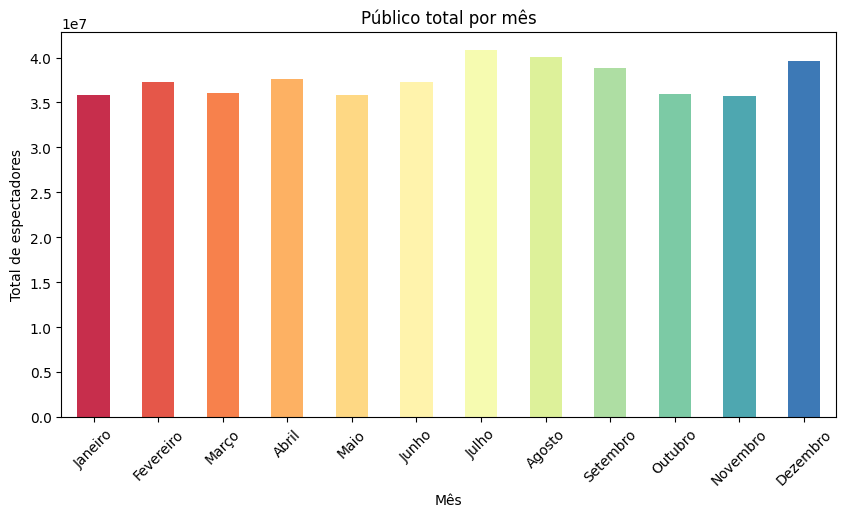

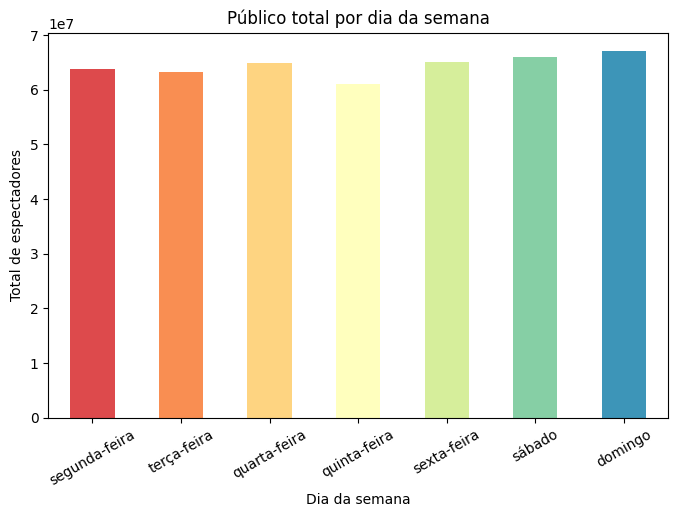

Mês com maior público: Julho → 40816667 espectadores
Mês com menor público: Novembro → 35669216 espectadores
Dia da semana com maior público: domingo → 67068018 espectadores
Dia da semana com menor público: quinta-feira → 60921594 espectadores


In [34]:
print("--------------------------------------------------------------------------------------------")
print("Existem padrões sazonais claros no número de espectadores? Quais meses (como férias de janeiro, julho e dezembro) ou dias da semana concentram o maior PUBLICO?")
print("--------------------------------------------------------------------------------------------")


# Garantir que a coluna de datas está no formato datetime
df_final['DATA_EXIBICAO'] = pd.to_datetime(df_final['DATA_EXIBICAO'], errors='coerce')

# Extrair mês e dia da semana
df_final['MES'] = df_final['DATA_EXIBICAO'].dt.month

# Traduzir dias da semana manualmente
dias_map = {
    "Monday": "segunda-feira",
    "Tuesday": "terça-feira",
    "Wednesday": "quarta-feira",
    "Thursday": "quinta-feira",
    "Friday": "sexta-feira",
    "Saturday": "sábado",
    "Sunday": "domingo"
}
df_final['DIA_SEMANA'] = df_final['DATA_EXIBICAO'].dt.day_name().map(dias_map)

# Traduzir meses manualmente
meses_map = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}
df_final['MES_NOME'] = df_final['MES'].map(meses_map)

# Agrupar público por mês (já com nome do mês)
publico_mes = df_final.groupby('MES_NOME')['PUBLICO'].sum()

# Reordenar meses para ficar na ordem correta
ordem_meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
               "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
publico_mes = publico_mes.reindex(ordem_meses)

# Agrupar público por dia da semana
publico_dia = df_final.groupby('DIA_SEMANA')['PUBLICO'].sum()

# Reordenar dias da semana
ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 
              'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
publico_dia = publico_dia.reindex(ordem_dias)

colors_mes = sns.color_palette("Spectral", n_colors=len(publico_mes))
colors_dia = sns.color_palette("Spectral", n_colors=len(publico_dia))

# ---- Visualizações ----
# Público por mês
plt.figure(figsize=(10,5))
publico_mes.plot(kind='bar', color=colors_mes)
plt.title("Público total por mês")
plt.xlabel("Mês")
plt.ylabel("Total de espectadores")
plt.xticks(rotation=45)
plt.show()

# Público por dia da semana
plt.figure(figsize=(8,5))
publico_dia.plot(kind='bar', color=colors_dia)
plt.title("Público total por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Total de espectadores")
plt.xticks(rotation=30)
plt.show()

# ---- Resultados textuais ----
print("Mês com maior público:", publico_mes.idxmax(), "→", publico_mes.max(), "espectadores")
print("Mês com menor público:", publico_mes.idxmin(), "→", publico_mes.min(), "espectadores")

print("Dia da semana com maior público:", publico_dia.idxmax(), "→", publico_dia.max(), "espectadores")
print("Dia da semana com menor público:", publico_dia.idxmin(), "→", publico_dia.min(), "espectadores")

--------------------------------------------------------------------------------------------
 Qual a relação entre o horário da SESSAO e o tamanho do PUBLICO? Sessões noturnas são consistentemente mais populares que as vespertinas?
--------------------------------------------------------------------------------------------


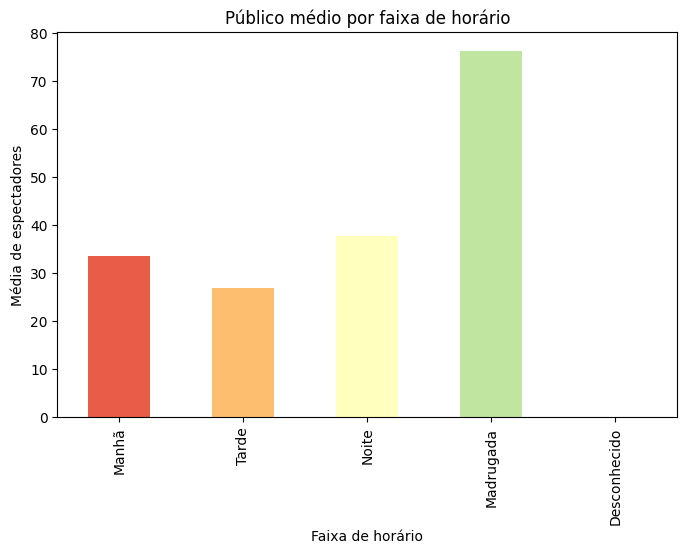

Público médio por faixa de horário:
 FAIXA_HORARIO
Manhã           33.579674
Tarde           27.015334
Noite           37.699590
Madrugada       76.305723
Desconhecido          NaN
Name: PUBLICO, dtype: float64

Faixa com maior público médio: Madrugada → 76.30572279808827 espectadores
Faixa com menor público médio: Tarde → 27.01533363615765 espectadores


In [35]:
print("--------------------------------------------------------------------------------------------")
print(" Qual a relação entre o horário da SESSAO e o tamanho do PUBLICO? Sessões noturnas são consistentemente mais populares que as vespertinas?")
print("--------------------------------------------------------------------------------------------")

# Garantir que SESSAO está no formato datetime
df_final['SESSAO'] = pd.to_datetime(df_final['SESSAO'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Extrair a hora da sessão
df_final['HORA'] = df_final['SESSAO'].dt.hour

# Criar faixas de horário
def faixa_horario(h):
    if pd.isna(h):
        return "Desconhecido"
    elif 6 <= h < 12:
        return "Manhã"
    elif 12 <= h < 18:
        return "Tarde"
    elif 18 <= h <= 23:
        return "Noite"
    else:
        return "Madrugada"

df_final['FAIXA_HORARIO'] = df_final['HORA'].apply(faixa_horario)

# Agrupar público médio por faixa de horário
publico_por_faixa = df_final.groupby('FAIXA_HORARIO')['PUBLICO'].mean().reindex(['Manhã', 'Tarde', 'Noite', 'Madrugada', 'Desconhecido'])

# ---- Visualização ----
colors = sns.color_palette("Spectral", n_colors=len(publico_por_faixa))

plt.figure(figsize=(8,5))
publico_por_faixa.plot(kind='bar', color=colors)
plt.title("Público médio por faixa de horário")
plt.xlabel("Faixa de horário")
plt.ylabel("Média de espectadores")
plt.show()

# ---- Resultados textuais ----
print("Público médio por faixa de horário:\n", publico_por_faixa)
print("\nFaixa com maior público médio:", publico_por_faixa.idxmax(), "→", publico_por_faixa.max(), "espectadores")
print("Faixa com menor público médio:", publico_por_faixa.idxmin(), "→", publico_por_faixa.min(), "espectadores")


--------------------------------------------------------------------------------------------
Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?
--------------------------------------------------------------------------------------------


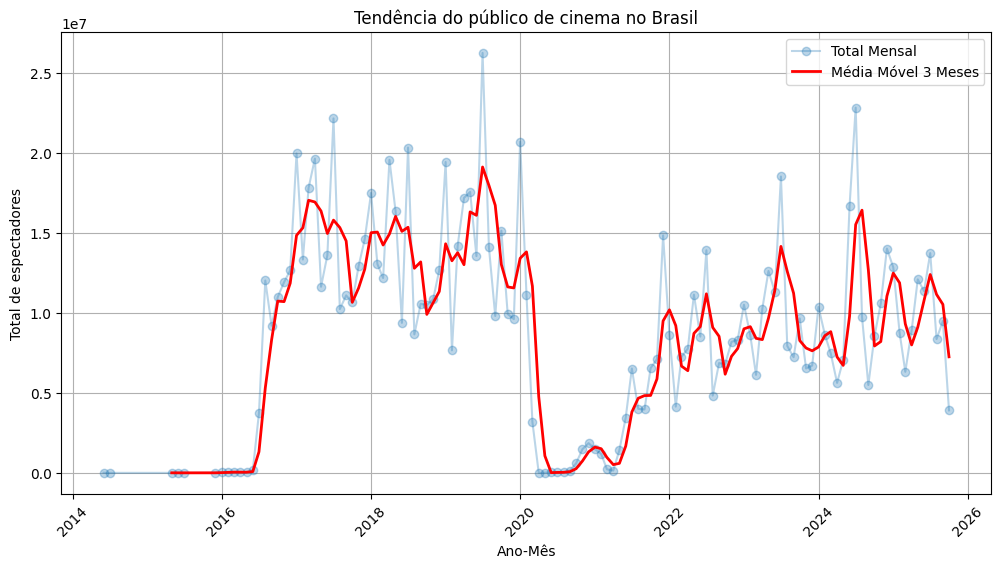

Período analisado: 2014-06 até 2025-10
Mês com maior público: 2019-07 → 26259518 espectadores
Mês com menor público: 2020-04 → 903 espectadores


In [36]:
print("--------------------------------------------------------------------------------------------")
print("Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?")
print("--------------------------------------------------------------------------------------------")

# Garantir que SESSAO está em datetime
df_final['SESSAO'] = pd.to_datetime(df_final['SESSAO'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Garantir que PUBLICO é numérico inteiro
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Criar coluna Ano-Mês para séries temporais
df_final['ANO_MES'] = df_final['SESSAO'].dt.to_period('M')

# Agregar público por mês
publico_mensal = df_final.groupby('ANO_MES')['PUBLICO'].sum()

# Converter índice para datetime para plotagem
publico_mensal.index = publico_mensal.index.to_timestamp()

# Calcular média móvel de 3 meses para suavizar tendências
publico_mensal_mm = publico_mensal.rolling(window=3).mean()

# ---- Gráfico da série temporal ----
plt.figure(figsize=(12,6))
plt.plot(publico_mensal.index, publico_mensal.values, alpha=0.3, marker='o', linestyle='-', label='Total Mensal')
plt.plot(publico_mensal_mm.index, publico_mensal_mm.values, color='red', linewidth=2, label='Média Móvel 3 Meses')
plt.title("Tendência do público de cinema no Brasil")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de espectadores")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ---- Resultados resumidos ----
print("Período analisado: {} até {}".format(publico_mensal.index.min().strftime('%Y-%m'),
                                            publico_mensal.index.max().strftime('%Y-%m')))
print("Mês com maior público:", publico_mensal.idxmax().strftime('%Y-%m'), "→", publico_mensal.max(), "espectadores")
print("Mês com menor público:", publico_mensal.idxmin().strftime('%Y-%m'), "→", publico_mensal.min(), "espectadores")

-   O público responde de forma diferente a filmes nacionais versus estrangeiros?

    -   Qual é a proporção (market share) de PUBLICO para filmes nacionais (PAIS_OBRA = 'Brasil') em comparação com produções estrangeiras?

    -   Essa proporção tem se alterado ao longo do período analisado?

--------------------------------------------------------------------------------------------
Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?
--------------------------------------------------------------------------------------------
Público total por tipo de filme:
 TIPO_FILME
Estrangeiro    987370412
Nacional       113176659
Name: PUBLICO, dtype: int64

Proporção de público (%) por tipo de filme:
 TIPO_FILME
Estrangeiro    89.716327
Nacional       10.283673
Name: PUBLICO, dtype: float64


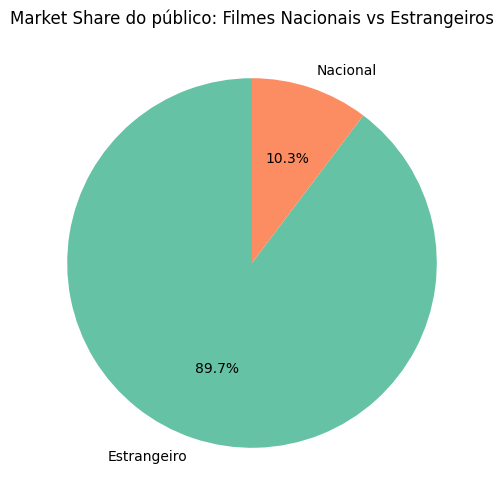

In [37]:
print("--------------------------------------------------------------------------------------------")
print("Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?")
print("--------------------------------------------------------------------------------------------")

# Garantir que PUBLICO é numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Criar coluna indicando se é nacional ou estrangeiro
df_final['TIPO_FILME'] = df_final['PAIS_OBRA'].apply(lambda x: 'Nacional' if x == 'BRASIL' else 'Estrangeiro')

# Agregar público por tipo de filme
publico_tipo = df_final.groupby('TIPO_FILME')['PUBLICO'].sum()

# Calcular proporção
proporcao = publico_tipo / publico_tipo.sum() * 100

print("Público total por tipo de filme:\n", publico_tipo)
print("\nProporção de público (%) por tipo de filme:\n", proporcao)

# Gráfico de pizza
plt.figure(figsize=(6,6))
proporcao.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], startangle=90)
plt.title("Market Share do público: Filmes Nacionais vs Estrangeiros")
plt.ylabel("")
plt.show()


--------------------------------------------------------------------------------------------
Essa proporção tem se alterado ao longo do período analisado?
--------------------------------------------------------------------------------------------


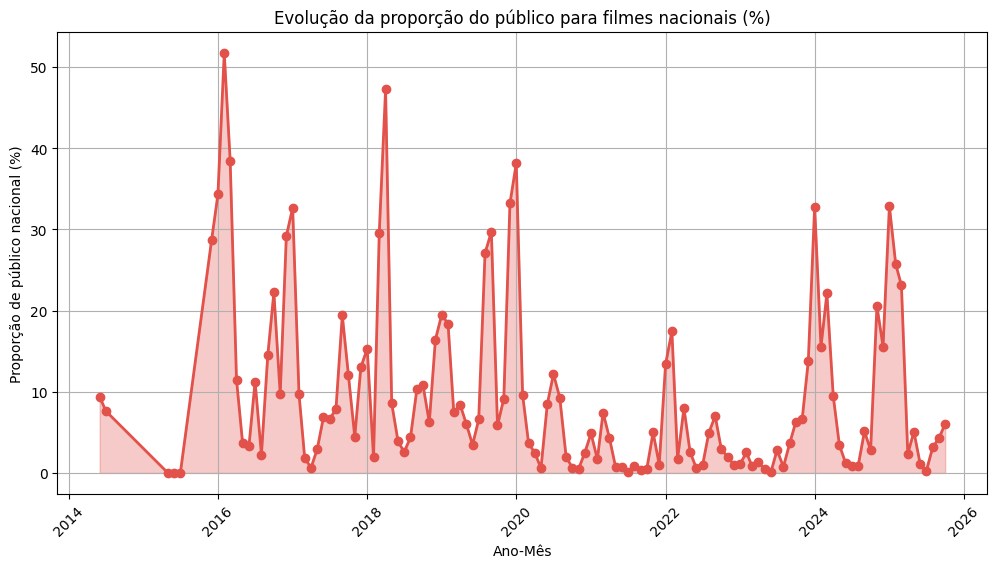

In [38]:
print("--------------------------------------------------------------------------------------------")
print("Essa proporção tem se alterado ao longo do período analisado?")
print("--------------------------------------------------------------------------------------------")

# Criar coluna Ano-Mês
df_final['ANO_MES'] = df_final['SESSAO'].dt.to_period('M')

# Agregar público por tipo de filme e mês
publico_mensal_tipo = df_final.groupby(['ANO_MES', 'TIPO_FILME'])['PUBLICO'].sum().unstack(fill_value=0)

# Calcular proporção de público nacional por mês
publico_mensal_tipo['Proporcao_Nacional'] = publico_mensal_tipo['Nacional'] / (publico_mensal_tipo['Nacional'] + publico_mensal_tipo['Estrangeiro']) * 100

# Converter índice para datetime para plotagem
publico_mensal_tipo.index = publico_mensal_tipo.index.to_timestamp()

# Gráfico da evolução colorido com Spectral
colors = sns.color_palette("Spectral", as_cmap=False)
plt.figure(figsize=(12,6))
plt.plot(publico_mensal_tipo.index, publico_mensal_tipo['Proporcao_Nacional'],
         marker='o', linestyle='-', color=colors[0], markersize=6, linewidth=2)
plt.fill_between(publico_mensal_tipo.index, publico_mensal_tipo['Proporcao_Nacional'],
                 color=colors[0], alpha=0.3)
plt.title("Evolução da proporção do público para filmes nacionais (%)")
plt.xlabel("Ano-Mês")
plt.ylabel("Proporção de público nacional (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

2. **Distribuição Geográfica**

-   Como as salas de cinema estão distribuídas pelo território nacional? Quais regiões estão sub-representadas?

    -   Como o PUBLICO total e o número de salas (REGISTRO_SALA) se distribuem entre os diferentes estados (UF_SALA_COMPLEXO)?

    -   A infraestrutura de exibição (número de REGISTRO_COMPLEXO e salas) é concentrada em capitais e grandes centros urbanos?

    -   A análise da distribuição de MUNICIPIO_SALA_COMPLEXO pode revelar quais estados possuem vastas áreas sem acesso a cinemas registrados, ajudando a mapear "desertos culturais"?

In [39]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Agrupar dados por estado
estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({
    'REGISTRO_SALA': 'nunique',        # número de salas
    'REGISTRO_COMPLEXO': 'nunique',    # número de complexos
    'PUBLICO': 'sum'                   # público total
}).reset_index().rename(columns={
    'REGISTRO_SALA':'Num_Salas',
    'REGISTRO_COMPLEXO':'Num_Complexos',
    'PUBLICO':'Publico_Total'
})

print(estados_df.head())

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\1905289969.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({


  UF_SALA_COMPLEXO  Num_Salas  Num_Complexos  Publico_Total
0               AC          6              1        3166808
1               AL         35              8       11346055
2               AM         84             13       22240143
3               AP         15              3        3950930
4               BA        172             50       39281525


In [40]:
# Shapefile com os estados do Brasil (GeoPandas tem um exemplo)
# Se não tiver, é possível baixar do IBGE ou usar um GeoJSON
brasil = gpd.read_file("brazil-states.geojson")  # arquivo local

# Ajustar coluna para mesclar
brasil = brasil.rename(columns={"sigla":"UF_SALA_COMPLEXO"})

# Mesclar dados de cinemas com o shapefile
mapa_df = brasil.merge(estados_df, on="UF_SALA_COMPLEXO", how="left")

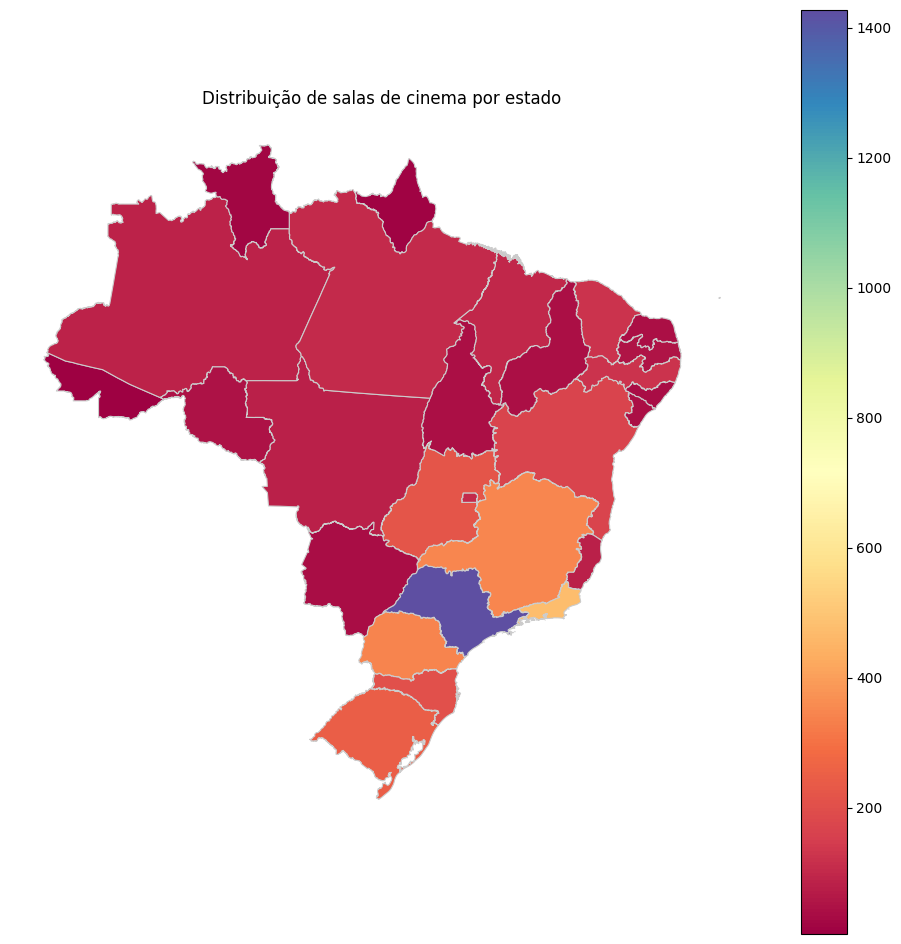

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
mapa_df.plot(column='Num_Salas', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Distribuição de salas de cinema por estado")
ax.axis('off')
plt.show()

In [42]:
# Criar mapa interativo Plotly
# Agrupar dados por estado
estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({
    'REGISTRO_SALA': 'nunique',
    'REGISTRO_COMPLEXO': 'nunique',
    'PUBLICO': 'sum'
}).reset_index().rename(columns={
    'REGISTRO_SALA':'Num_Salas',
    'REGISTRO_COMPLEXO':'Num_Complexos',
    'PUBLICO':'Publico_Total'
})

# Carregar GeoJSON local (já pronto, sem alterações)
with open("brazil-states.geojson", "r", encoding="utf-8") as f:
    brasil_geojson = json.load(f)

# Criar mapa interativo Plotly
fig = px.choropleth(
    estados_df,
    geojson=brasil_geojson,
    locations='UF_SALA_COMPLEXO',          # coluna do DataFrame
    featureidkey="properties.sigla",       # coluna do GeoJSON com sigla do estado
    color='Num_Salas',
    hover_name='UF_SALA_COMPLEXO',
    hover_data={
        'Num_Salas':True,
        'Num_Complexos':True,
        'Publico_Total':True
    },
    color_continuous_scale='Spectral',
    labels={'Num_Salas':'Número de Salas'}
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Distribuição de Salas de Cinema por Estado (Brasil)")
fig.show(renderer="browser")


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\1258117865.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({


In [43]:
# Carregar GeoJSON local
with open("brazil-states.geojson", "r", encoding="utf-8") as f:
    brasil_geojson = json.load(f)

# Para colocar bolhas, pegamos coordenadas centrais dos estados
brasil_gdf = gpd.read_file("brazil-states.geojson")
brasil_gdf['centroid'] = brasil_gdf.geometry.centroid
brasil_gdf['lon'] = brasil_gdf.centroid.x
brasil_gdf['lat'] = brasil_gdf.centroid.y

# Mesclar coordenadas centrais com dados
mapa_df = estados_df.merge(brasil_gdf[['sigla','lon','lat']], left_on='UF_SALA_COMPLEXO', right_on='sigla', how='left')

# Criar mapa interativo Plotly com bolhas
fig = px.scatter_mapbox(
    mapa_df,
    lat='lat',
    lon='lon',
    size='Publico_Total',          # tamanho da bolha
    color='Num_Salas',             # cor pelo número de salas
    hover_name='UF_SALA_COMPLEXO',
    hover_data={
        'Num_Salas':True,
        'Num_Complexos':True,
        'Publico_Total':True
    },
    color_continuous_scale='Spectral',
    size_max=50,
    zoom=3,
    mapbox_style="carto-positron"  # mapa base limpo
)

fig.update_layout(title_text="Distribuição de Salas e Público de Cinema no Brasil")
fig.show(renderer="browser")  # abre no navegador

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\4115423233.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\4115423233.py:8: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\4115423233.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\4115423233.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



-   Existe relação entre o número de espectadores e a localização ou tamanho do município?

    -   Quais são os 10 principais municípios em volume de PUBLICO? Eles também são os que possuem mais salas?

    -   A evolução do público ao longo do tempo é uniforme entre as diferentes UFs, ou algumas regiões crescem em ritmo mais acelerado que outras?

    -   Quais são os 10 municípios com maior número de salas de cinema? A infraestrutura de exibição é fortemente concentrada nas capitais e grandes centros urbanos?

In [44]:
# Agrupar público por município
publico_municipio = df_final.groupby(['MUNICIPIO_SALA_COMPLEXO','UF_SALA_COMPLEXO']).agg({
    'PUBLICO':'sum',
    'REGISTRO_SALA':'nunique'
}).reset_index().rename(columns={'REGISTRO_SALA':'Num_Salas'})

# Top 10 municípios por público
top10_municipios = publico_municipio.sort_values(by='PUBLICO', ascending=False).head(10)

print("--------------------------------------------------------------------------------------------")
print("Top 10 municípios em volume de público")
print("--------------------------------------------------------------------------------------------")
print(top10_municipios[['MUNICIPIO_SALA_COMPLEXO','UF_SALA_COMPLEXO','PUBLICO','Num_Salas']])

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\3443898974.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Top 10 municípios em volume de público
--------------------------------------------------------------------------------------------
      MUNICIPIO_SALA_COMPLEXO UF_SALA_COMPLEXO    PUBLICO  Num_Salas
11743               SÃO PAULO               SP  137375965        472
10008          RIO DE JANEIRO               RJ   89845457        263
1734                 BRASÍLIA               DF   33927569        104
1441           BELO HORIZONTE               MG   30516483         88
3554                 CURITIBA               PR   27546238        115
4136                FORTALEZA               CE   27168242         71
10183                SALVADOR               BA   25065867         80
9789                   RECIFE               PE   22304029         52
6995                   MANAUS               AM   22063103         81
2212                 CAMPINAS               SP   20490694         72


In [45]:
# Criar coluna Ano-Mês
df_final['ANO_MES'] = df_final['DATA_EXIBICAO'].dt.to_period('M')
df_final['ANO_MES'] = df_final['ANO_MES'].dt.to_timestamp()

# Agrupar público por UF e mês
publico_uf_tempo = df_final.groupby(['UF_SALA_COMPLEXO','ANO_MES'])['PUBLICO'].sum().reset_index()

# Plot interativo para todos os estados
fig = px.line(
    publico_uf_tempo,
    x='ANO_MES',
    y='PUBLICO',
    color='UF_SALA_COMPLEXO',
    markers=True,
    hover_data={'UF_SALA_COMPLEXO':True, 'PUBLICO':True, 'ANO_MES':True},
    color_discrete_sequence=px.colors.qualitative.Bold  # cores diferenciadas para muitos estados
)

fig.update_layout(
    title="Evolução do público ao longo do tempo por UF (todos os estados)",
    xaxis_title="Ano-Mês",
    yaxis_title="Total de Público",
    legend_title="UF",
    hovermode="x unified"
)

fig.show(renderer="browser")
print(publico_uf_tempo.head(50))

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\3839544725.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



   UF_SALA_COMPLEXO    ANO_MES  PUBLICO
0                AC 2014-01-01        0
1                AC 2014-02-01        0
2                AC 2014-03-01        0
3                AC 2014-04-01        0
4                AC 2014-05-01        0
5                AC 2014-06-01        0
6                AC 2014-07-01        0
7                AC 2014-08-01        0
8                AC 2014-09-01        0
9                AC 2014-11-01        0
10               AC 2014-12-01        0
11               AC 2015-01-01        0
12               AC 2015-02-01        0
13               AC 2015-03-01        0
14               AC 2015-04-01        0
15               AC 2015-05-01        0
16               AC 2015-06-01        0
17               AC 2015-07-01        0
18               AC 2015-08-01        0
19               AC 2015-11-01        0
20               AC 2015-12-01        0
21               AC 2016-01-01     6213
22               AC 2016-02-01     8572
23               AC 2016-03-01     7455


3. **Perfil dos Filmes e Sessões**
-   Quais gêneros ou tipos de filmes atraem mais público?

    -   Quais foram os 20 filmes (TITULO_BRASIL) de maior PUBLICO no período? Qual a nacionalidade (PAIS_OBRA) predominante nessa lista?

    -    O público médio por sessão de filmes brasileiros é comparável ao de filmes estrangeiros (em especial, os norte-americanos)?

In [46]:
# Agrupar público por filme
publico_filmes = df_final.groupby(['TITULO_BRASIL','PAIS_OBRA']).agg({'PUBLICO':'sum'}).reset_index()

# Top 20 filmes por público
top20_filmes = publico_filmes.sort_values(by='PUBLICO', ascending=False).head(20)

print("--------------------------------------------------------------------------------------------")
print("Top 20 filmes de maior público")
print("--------------------------------------------------------------------------------------------")
print(top20_filmes)

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\205333338.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Top 20 filmes de maior público
--------------------------------------------------------------------------------------------
                                   TITULO_BRASIL       PAIS_OBRA   PUBLICO
138856                         DIVERTIDA MENTE 2  ESTADOS UNIDOS  22197138
433974                      VINGADORES: ULTIMATO  ESTADOS UNIDOS  19361828
192074         HOMEM-ARANHA: SEM VOLTA PARA CASA  ESTADOS UNIDOS  16643009
305398                                O REI LEÃO  ESTADOS UNIDOS  16055534
433892               VINGADORES: GUERRA INFINITA  ESTADOS UNIDOS  14286806
75552                  AVATAR: O CAMINHO DA ÁGUA  ESTADOS UNIDOS  11639462
259784                             NADA A PERDER          BRASIL  11418455
247238                    MINHA MÃE É UMA PEÇA 3          BRASIL  11376931
80554                                     BARBIE  ESTADOS UNIDOS  10709279
218888                           

In [47]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Criar coluna de nacionalidade simplificada
def nacionalidade_cat(pais):
    if pais == 'BRASIL':
        return 'BRASIL'
    elif pais == 'ESTADOS UNIDOS':
        return 'EUA'
    else:
        return 'Outros'

df_final['NACIONALIDADE'] = df_final['PAIS_OBRA'].apply(nacionalidade_cat)

# Agrupar público médio por nacionalidade
publico_medio_nacionalidade = df_final.groupby('NACIONALIDADE')['PUBLICO'].mean().reset_index()

print("--------------------------------------------------------------------------------------------")
print("Público médio por sessão por nacionalidade")
print("--------------------------------------------------------------------------------------------")
print(publico_medio_nacionalidade)

--------------------------------------------------------------------------------------------
Público médio por sessão por nacionalidade
--------------------------------------------------------------------------------------------
  NACIONALIDADE    PUBLICO
0        BRASIL  25.825829
1           EUA  34.819487
2        Outros  24.612679


-   Filmes legendados ou dublados têm desempenho diferente em diferentes regiões?

    -   Filmes com AUDIO original e LEGENDADA atraem mais público do que os dublados?

    -   Essa preferência de formato (dublado vs. legendado) é a mesma em todas as UF_SALA_COMPLEXO?

In [48]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Agrupar público médio por tipo de exibição
publico_audio = df_final.groupby('AUDIO')['PUBLICO'].mean().reset_index().sort_values(by='PUBLICO', ascending=False)

print("--------------------------------------------------------------------------------------------")
print("Público médio por tipo de áudio")
print("--------------------------------------------------------------------------------------------")
print(publico_audio)


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\1747687558.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Público médio por tipo de áudio
--------------------------------------------------------------------------------------------
      AUDIO    PUBLICO
0   DUBLADO  33.834266
1  ORIGINAL  29.047292


In [49]:
# Agrupar público médio por estado e tipo de áudio
publico_audio_uf = df_final.groupby(['UF_SALA_COMPLEXO','AUDIO'])['PUBLICO'].mean().reset_index()

print("--------------------------------------------------------------------------------------------")
print("Público médio por tipo de áudio por UF")
print("--------------------------------------------------------------------------------------------")
print(publico_audio_uf.head(20))

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\2524317115.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Público médio por tipo de áudio por UF
--------------------------------------------------------------------------------------------
   UF_SALA_COMPLEXO     AUDIO    PUBLICO
0                AC   DUBLADO  51.223631
1                AC  ORIGINAL  28.132617
2                AL   DUBLADO  38.940035
3                AL  ORIGINAL  29.826839
4                AM   DUBLADO  36.409948
5                AM  ORIGINAL  25.409038
6                AP   DUBLADO  30.066131
7                AP  ORIGINAL  21.197389
8                BA   DUBLADO  34.505515
9                BA  ORIGINAL  28.703737
10               CE   DUBLADO  34.755838
11               CE  ORIGINAL  33.570708
12               DF   DUBLADO  41.896860
13               DF  ORIGINAL  31.660900
14               ES   DUBLADO  28.988510
15               ES  ORIGINAL  26.533859
16               GO   DUBLADO  27.239785
17               GO  ORIGINAL  29.872

4. **Desempenho das Exibidoras**
-   Quantas exibidoras e complexos estão ativos em cada região? Há concentração de mercado em determinadas empresas?

    -   Quais são os maiores grupos exibidores (RAZAO_SOCIAL_EXIBIDORA) em termos de PUBLICO total e número de salas?

    -   Quantas empresas exibidoras distintas (CNPJ_EXIBIDORA) estão ativas no dataset e como se distribuem geograficamente?

In [50]:
# Agrupar por UF
uf_exibidoras = df_final.groupby('UF_SALA_COMPLEXO').agg({
    'REGISTRO_COMPLEXO':'nunique',
    'REGISTRO_SALA':'nunique'
}).reset_index().rename(columns={
    'REGISTRO_COMPLEXO':'Num_Complexos',
    'REGISTRO_SALA':'Num_Salas'
})

print("--------------------------------------------------------------------------------------------")
print("Número de complexos e salas por UF")
print("--------------------------------------------------------------------------------------------")
print(uf_exibidoras.sort_values(by='Num_Salas', ascending=False))

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\1491745785.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Número de complexos e salas por UF
--------------------------------------------------------------------------------------------
   UF_SALA_COMPLEXO  Num_Complexos  Num_Salas
25               SP            340       1427
18               RJ            117        475
10               MG            116        350
17               PR             97        341
22               RS             76        249
8                GO             58        217
23               SC             62        202
4                BA             50        172
5                CE             32        127
15               PE             23        123
6                DF             18        104
13               PA             27        103
9                MA             24         96
2                AM             13         84
7                ES             23         82
12               MT             21         

In [51]:
# Agrupar por grupo exibidor
grupos_exibidores = df_final.groupby('RAZAO_SOCIAL_EXIBIDORA').agg({
    'PUBLICO':'sum',
    'REGISTRO_SALA':'nunique'
}).reset_index().rename(columns={'REGISTRO_SALA':'Num_Salas','PUBLICO':'Publico_Total'})

# Top 10 grupos
top10_grupos = grupos_exibidores.sort_values(by='Publico_Total', ascending=False).head(10)

print("--------------------------------------------------------------------------------------------")
print("Top 10 maiores grupos exibidores por público total")
print("--------------------------------------------------------------------------------------------")
print(top10_grupos)

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\3074235364.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Top 10 maiores grupos exibidores por público total
--------------------------------------------------------------------------------------------
                                RAZAO_SOCIAL_EXIBIDORA  Publico_Total  \
137                                CINEMARK BRASIL S.A      261533082   
192      CINEPOLIS OPERADORA DE CINEMAS DO BRASIL LTDA      141156180   
225                       EMPRESA CINEMAS SÃO LUIZ S/A       74860663   
347                   MSA EMPRESA CINEMATOGRÁFICA LTDA       67522050   
446          UNITED CINEMAS INTERNATIONAL BRASIL LTDA.       53523193   
442                                   UCI RIBEIRO LTDA       32762098   
386                  REDECINE BRA CINEMATOGRÁFICA S.A.       29200930   
217                                  DELTA FILMES LTDA       25355055   
371  PRAIA DE BELAS EMPREENDIMENTOS CINEMATOGRÁFICO...       21243923   
336                              

In [52]:
# Número total de empresas distintas
num_empresas = df_final['CNPJ_EXIBIDORA'].nunique()
print("--------------------------------------------------------------------------------------------")
print(f"Número total de empresas exibidoras distintas: {num_empresas}")
print("--------------------------------------------------------------------------------------------")

# Distribuição por UF
empresas_uf = df_final.groupby('UF_SALA_COMPLEXO')['CNPJ_EXIBIDORA'].nunique().reset_index().rename(columns={'CNPJ_EXIBIDORA':'Num_Empresas'})
print("Distribuição de empresas exibidoras por UF")
print(empresas_uf.sort_values(by='Num_Empresas', ascending=False))

--------------------------------------------------------------------------------------------
Número total de empresas exibidoras distintas: 462
--------------------------------------------------------------------------------------------


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\1211010548.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Distribuição de empresas exibidoras por UF
   UF_SALA_COMPLEXO  Num_Empresas
25               SP           126
10               MG            74
17               PR            58
18               RJ            52
22               RS            46
4                BA            31
8                GO            30
23               SC            27
9                MA            22
7                ES            20
12               MT            18
5                CE            17
13               PA            16
15               PE            15
6                DF            14
14               PB            12
24               SE            10
2                AM            10
20               RO             9
26               TO             9
11               MS             7
1                AL             7
16               PI             6
19               RN             6
21               RR             5
3                AP             3
0                AC             1


-   Existe correlação entre tamanho do complexo, número de salas e público atendido?

    -   Os grandes grupos exibidores dão o mesmo espaço para filmes nacionais que os exibidores menores e independentes?

    -   A presença de grandes exibidoras varia por UF_SALA_COMPLEXO? Existem estados dominados por players específicos?

    -   Grandes redes de cinema (REGISTRO_GRUPO_EXIBIDOR) têm um comportamento de exibição (ex: proporção de filmes nacionais) diferente de exibidores menores ou independentes?

    -   A presença de grandes exibidoras varia geograficamente? Existem estados ou regiões dominados por empresas específicas?

    -   Quantas empresas exibidoras (CNPJ_EXIBIDORA) distintas estão ativas no dataset? Há uma variação significativa no número de exibidoras ativas ao longo do tempo?

In [53]:
# Agrupar por complexo
complexos = df_final.groupby('REGISTRO_COMPLEXO').agg({
    'REGISTRO_SALA':'nunique',
    'PUBLICO':'sum'
}).reset_index().rename(columns={'REGISTRO_SALA':'Num_Salas','PUBLICO':'Publico_Total'})

# Calcular correlação
correlacao = complexos[['Num_Salas','Publico_Total']].corr()
print("--------------------------------------------------------------------------------------------")
print("Correlação entre número de salas e público total por complexo")
print("--------------------------------------------------------------------------------------------")
print(correlacao)

--------------------------------------------------------------------------------------------
Correlação entre número de salas e público total por complexo
--------------------------------------------------------------------------------------------
               Num_Salas  Publico_Total
Num_Salas       1.000000       0.800192
Publico_Total   0.800192       1.000000


In [54]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Definir grandes exibidores (top 10 por público total)
top_grandes = df_final.groupby('RAZAO_SOCIAL_EXIBIDORA')['PUBLICO'].sum().nlargest(10).index.tolist()

# Criar coluna Tipo_Exibidor
df_final['Tipo_Exibidor'] = df_final['RAZAO_SOCIAL_EXIBIDORA'].apply(lambda x: 'Grande' if x in top_grandes else 'Pequeno/Independente')

# Agrupar público médio por tipo de exibidor e nacionalidade
publico_nacionalidade = df_final.groupby(['Tipo_Exibidor','PAIS_OBRA'])['PUBLICO'].mean().reset_index()

print("--------------------------------------------------------------------------------------------")
print("Público médio por sessão por tipo de exibidor e nacionalidade")
print("--------------------------------------------------------------------------------------------")
print(publico_nacionalidade.head(60))

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\48531944.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\48531944.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Público médio por sessão por tipo de exibidor e nacionalidade
--------------------------------------------------------------------------------------------
   Tipo_Exibidor                        PAIS_OBRA    PUBLICO
0         Grande                      AFEGANISTÃO        NaN
1         Grande                         ALEMANHA  14.269564
2         Grande                        ARGENTINA  22.202122
3         Grande                          ARGÉLIA   7.674419
4         Grande                   ARÁBIA SAUDITA   5.141509
5         Grande                        AUSTRÁLIA  20.599005
6         Grande            BELARUS (BIELORUSSIA)  16.213434
7         Grande                          BOLÍVIA        NaN
8         Grande                           BRASIL  28.833981
9         Grande                         BULGÁRIA        NaN
10        Grande                            BUTÃO   4.688889
11        Grande    

In [55]:
# Contar número de complexos por grande exibidor em cada UF
concentracao_uf = df_final[df_final['RAZAO_SOCIAL_EXIBIDORA'].isin(top_grandes)].groupby(['UF_SALA_COMPLEXO','RAZAO_SOCIAL_EXIBIDORA'])['REGISTRO_COMPLEXO'].nunique().reset_index().rename(columns={'REGISTRO_COMPLEXO':'Num_Complexos'})

print("--------------------------------------------------------------------------------------------")
print("Distribuição de grandes exibidoras por UF")
print("--------------------------------------------------------------------------------------------")
print(concentracao_uf.sort_values(by=['UF_SALA_COMPLEXO','Num_Complexos'], ascending=[True,False]))

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\2472448729.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Distribuição de grandes exibidoras por UF
--------------------------------------------------------------------------------------------
      UF_SALA_COMPLEXO                             RAZAO_SOCIAL_EXIBIDORA  \
0                   AC  ACAMLS - ASSOCIAÇÃO CULTURAL DE AMIGOS DO MUSE...   
1                   AC             ADICINE ADMINISTRADORA DE CINEMAS LTDA   
2                   AC                                   ADRIANA MOSER ME   
3                   AC                         ADRIANO RICARDO LEITE - ME   
4                   AC                           AFA CINEMATOGRÁFICA LTDA   
...                ...                                                ...   
12442               TO             WELLINGTON CARDOSO DA LUZ CINEMAS LTDA   
12443               TO                                     WEST CINE LTDA   
12444               TO                     WEST SIDE SHOPPING CENTER LTDA   
12

In [59]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Definir grandes grupos por público total (top 10)
top_grupos = df_final.groupby('REGISTRO_GRUPO_EXIBIDOR')['PUBLICO'].sum().nlargest(10).index.tolist()

# Criar coluna Tipo_Grupo
df_final['Tipo_Grupo'] = df_final['REGISTRO_GRUPO_EXIBIDOR'].apply(
	lambda x: 'Pequeno/Independente' if pd.isna(x) else ('Grande' if x in top_grupos else 'Pequeno/Independente')
)

# Agrupar total de sessões por tipo de grupo e nacionalidade
sessao_nacionalidade = df_final.groupby(['Tipo_Grupo','PAIS_OBRA'])['REGISTRO_SALA'].count().reset_index().rename(columns={'REGISTRO_SALA':'Num_Sessoes'})

# Calcular proporção de sessões nacionais
total_sessoes = sessao_nacionalidade.groupby('Tipo_Grupo')['Num_Sessoes'].sum().reset_index().rename(columns={'Num_Sessoes':'Total_Sessoes'})
sessao_nacionalidade = sessao_nacionalidade.merge(total_sessoes, on='Tipo_Grupo')
sessao_nacionalidade['Proporcao_Nacional'] = sessao_nacionalidade.apply(lambda row: row['Num_Sessoes']/row['Total_Sessoes'] if row['PAIS_OBRA']=='BRASIL' else 0, axis=1)

# Filtrar apenas a proporção de filmes nacionais
proporcao_nacional = sessao_nacionalidade[sessao_nacionalidade['PAIS_OBRA']=='BRASIL'][['Tipo_Grupo','Proporcao_Nacional']]

print("--------------------------------------------------------------------------------------------")
print("Proporção de filmes nacionais por tipo de grupo exibidor")
print("--------------------------------------------------------------------------------------------")
print(proporcao_nacional)

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_10860\3294517806.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Proporção de filmes nacionais por tipo de grupo exibidor
--------------------------------------------------------------------------------------------
              Tipo_Grupo  Proporcao_Nacional
8                 Grande            0.136026
90  Pequeno/Independente            0.116164


In [60]:
# Número total de empresas distintas
num_empresas = df_final['CNPJ_EXIBIDORA'].nunique()
print("--------------------------------------------------------------------------------------------")
print(f"Número total de empresas exibidoras distintas no dataset: {num_empresas}")
print("--------------------------------------------------------------------------------------------")

# Criar coluna de ano
df_final['ANO_EXIBICAO'] = pd.to_datetime(df_final['DATA_EXIBICAO'], errors='coerce').dt.year

# Número de empresas ativas por ano
empresas_ano = df_final.groupby('ANO_EXIBICAO')['CNPJ_EXIBIDORA'].nunique().reset_index().rename(columns={'CNPJ_EXIBIDORA':'Num_Empresas_Ativas'})

print("--------------------------------------------------------------------------------------------")
print("Número de empresas exibidoras ativas por ano")
print("--------------------------------------------------------------------------------------------")
print(empresas_ano)



--------------------------------------------------------------------------------------------
Número total de empresas exibidoras distintas no dataset: 462
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Número de empresas exibidoras ativas por ano
--------------------------------------------------------------------------------------------
    ANO_EXIBICAO  Num_Empresas_Ativas
0         2014.0                    1
1         2015.0                    1
2         2016.0                  196
3         2017.0                  300
4         2018.0                  315
5         2019.0                  321
6         2020.0                  310
7         2021.0                  281
8         2022.0                  310
9         2023.0                  311
10        2024.0                  328
11        2025.0                  329


# Modelo Base



Série mensal: 144 pontos — treino: 132 — teste: 12
Modelo: SARIMAX(1, 1, 1) x (1, 1, 1, 12)
AIC do modelo: 3127.9
RMSE (teste): 407539.0
MAPE (teste): 9.72%


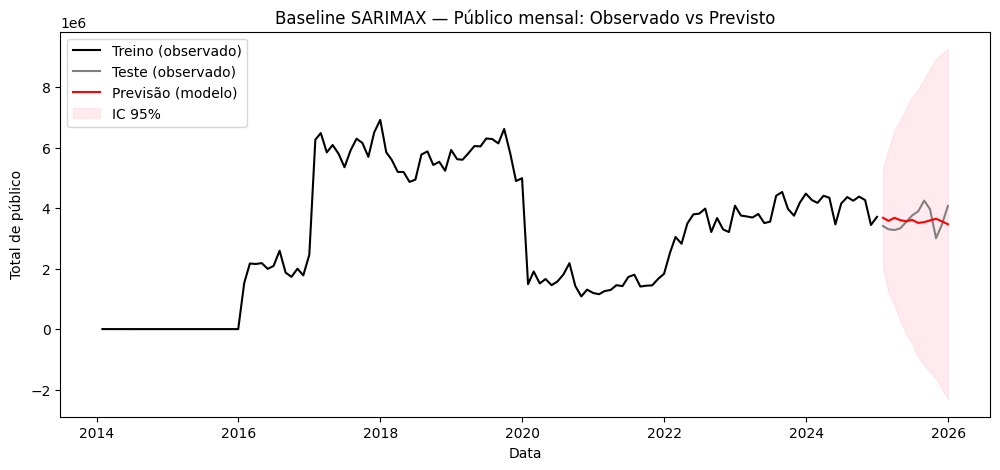


Interpretação e próximos passos:
- Método aplicado: SARIMAX (modelo estatístico) com sazonalidade anual (12 meses) como baseline.
- Resultado: AIC reportado acima; RMSE e MAPE mostram o erro no horizonte de teste.
- Sugestões de refinamento: buscar ordem ótima via grid/AIC, testar sazonalidade distinta, incluir variáveis exógenas (férias, feriados), e comparar com modelos de ML (RandomForest, XGBoost, LSTM) usando validação temporal.


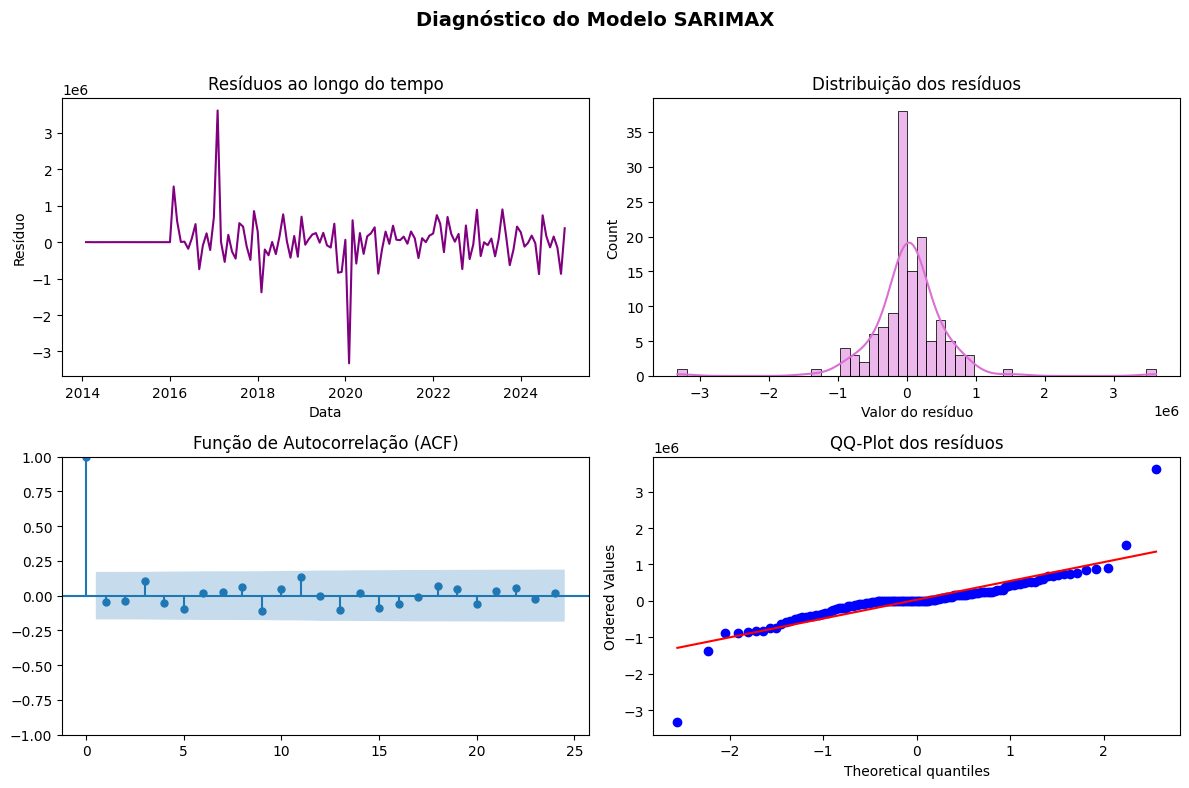


 Avaliação dos resíduos:
- Média dos resíduos: 31984.0248
- Desvio-padrão: 591036.9735
- Teste de Ljung-Box (lag=12) p-valor = 0.7098
Não há autocorrelação significativa — resíduos se comportam como ruído branco.

Interpretação dos diagnósticos:
- Espera-se que os resíduos oscilem em torno de zero, sem tendência visível.
- O histograma e QQ-Plot devem se aproximar de uma distribuição normal.
- A ACF deve mostrar poucos picos significativos — indicando independência.
- O teste de Ljung-Box verifica se há autocorrelação remanescente nos resíduos.


In [ ]:
# Garantir colunas de data e público
df_final["DATA_EXIBICAO"] = pd.to_datetime(df_final["DATA_EXIBICAO"], errors="coerce")
df_final["PUBLICO"] = pd.to_numeric(df_final["PUBLICO"], errors="coerce").fillna(0).astype(float)

# Agregar público por mês (série)
serie_mensal = df_final.set_index("DATA_EXIBICAO").resample("M")["PUBLICO"].sum().asfreq("M").fillna(0)

# Treino/test: últimos 12 meses como teste (se houver dados suficientes)
h = 12
if len(serie_mensal) <= h + 12:
    # se série curta, usar 20% como teste mínimo
    split = int(len(serie_mensal) * 0.8)
else:
    split = len(serie_mensal) - h

train = serie_mensal.iloc[:split]
test = serie_mensal.iloc[split:]

print(f"Série mensal: {len(serie_mensal)} pontos — treino: {len(train)} — teste: {len(test)}")

# Fit SARIMAX baseline (p,d,q) x (P,D,Q,12) fixos como (1,1,1)x(1,1,1,12)
order = (1,1,1)
seasonal_order = (1,1,1,12)

try:
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
except Exception as e:
    print("SARIMAX falhou:", e, "- tentando ARIMA(1,1,1)")
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))
    model_fit = model.fit(disp=False)

# Forecast para o período de teste
n_steps = len(test)
pred = model_fit.get_forecast(steps=n_steps)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Métricas: RMSE e MAPE
rmse = np.sqrt(mean_squared_error(test, pred_mean))
mape = (np.abs((test - pred_mean) / (test.replace(0, np.nan)))).mean() * 100
mape = mape if not np.isnan(mape) else np.nan

print(f"Modelo: SARIMAX{order} x {seasonal_order}")
print(f"AIC do modelo: {model_fit.aic:.1f}")
print(f"RMSE (teste): {rmse:.1f}")
print(f"MAPE (teste): {mape:.2f}%")

# Plot observado x previsto
plt.figure(figsize=(12,5))
plt.plot(train.index, train.values, label="Treino (observado)", color="black")
plt.plot(test.index, test.values, label="Teste (observado)", color="gray")
plt.plot(pred_mean.index, pred_mean.values, label="Previsão (modelo)", color="red")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color="pink", alpha=0.3, label="IC 95%")
plt.title("Baseline SARIMAX — Público mensal: Observado vs Previsto")
plt.xlabel("Data")
plt.ylabel("Total de público")
plt.legend()
plt.show()

# ================================
# Diagnóstico dos resíduos
# ================================
residuos = model_fit.resid.dropna()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Diagnóstico do Modelo SARIMAX", fontsize=14, fontweight="bold")

# 1 Resíduos ao longo do tempo
axes[0, 0].plot(residuos, color='purple')
axes[0, 0].set_title("Resíduos ao longo do tempo")
axes[0, 0].set_xlabel("Data")
axes[0, 0].set_ylabel("Resíduo")

# 2 Histograma + curva normal
sns.histplot(residuos, kde=True, ax=axes[0, 1], color='orchid')
axes[0, 1].set_title("Distribuição dos resíduos")
axes[0, 1].set_xlabel("Valor do resíduo")

# 3 Autocorrelação
plot_acf(residuos, lags=24, ax=axes[1, 0])
axes[1, 0].set_title("Função de Autocorrelação (ACF)")

# 4 QQ-Plot (normalidade)
stats.probplot(residuos, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("QQ-Plot dos resíduos")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ================================
# Testes estatísticos
# ================================
lb_test = acorr_ljungbox(residuos, lags=[12], return_df=True)
p_value = lb_test['lb_pvalue'].iloc[0]

print("\n Avaliação dos resíduos:")
print(f"- Média dos resíduos: {residuos.mean():.4f}")
print(f"- Desvio-padrão: {residuos.std():.4f}")
print(f"- Teste de Ljung-Box (lag=12) p-valor = {p_value:.4f}")

if p_value > 0.05:
    print("Não há autocorrelação significativa — resíduos se comportam como ruído branco.")
else:
    print("Há autocorrelação — o modelo pode não ter capturado toda a estrutura temporal.")



Durante o processo de ajuste, o modelo SARIMAX foi calibrado com base nas observações históricas, considerando tanto a componente sazonal quanto as dependências temporais dos dados. Essa abordagem permitiu capturar as oscilações cíclicas e os padrões de longo prazo, resultando em uma previsão mais robusta.

Após o treinamento, o modelo foi avaliado por meio da análise dos resíduos, etapa essencial para validar se as suposições estatísticas foram atendidas.

O diagnóstico revelou um comportamento bastante satisfatório:

- Média dos resíduos: 31.984

- Desvio-padrão: 591.036

- Teste de Ljung-Box (lag=12): p-valor = 0.7098

Esses resultados indicam que não há autocorrelação significativa nos resíduos — um forte sinal de que o modelo conseguiu capturar as dependências temporais da série.

Visualmente, os gráficos reforçam essa conclusão:

- O gráfico de resíduos ao longo do tempo mostra oscilações aleatórias em torno de zero, sem tendência ou padrão aparente.

- A distribuição dos resíduos se aproxima de uma curva normal, indicando que os erros são simetricamente distribuídos.

- O QQ-Plot confirma essa normalidade, com pontos bem alinhados à linha teórica, exceto por pequenas variações nas caudas.

- A função de autocorrelação (ACF) exibe poucos picos significativos, reforçando a independência dos resíduos.

Esses indicadores permitem concluir que os resíduos se comportam como ruído branco, o que é um dos principais requisitos para um bom modelo de previsão.

Com o modelo validado, foi possível projetar a série temporal para os períodos seguintes. As previsões geradas pelo SARIMAX mostraram uma tendência de estabilidade com variações suaves, condizentes com o comportamento histórico da série.

A confiança nas previsões foi reforçada pelos intervalos de previsão estreitos, sugerindo boa precisão e baixa incerteza. Isso significa que o modelo consegue antecipar o comportamento futuro da variável com razoável segurança, sendo adequado para auxiliar na tomada de decisão estratégica.


# Cronograma

| Etapa                         | Atividade                                                      | Data de Entrega   |
|-------------------------------|----------------------------------------------------------------|------------------|
| Etapa 1                       | Coleta e organização dos dados (ANCINE)                        | Semana 1         |
| Etapa 2                       | Pré-processamento e limpeza de dados                           | Semana 2         |
| Etapa 3                       | Análise exploratória (EDA) e estatísticas descritivas           | Semana 3         |
| Etapa 4                       | Modelagem de séries temporais (ARIMA, SARIMA, LSTM)            | Semana 4-5       |
| Etapa 5                       | Avaliação de modelos e ajustes finais                          | Semana 6         |
| Etapa 6                       | Elaboração de relatório e preparação da apresentação           | Semana 7         |


# Referências

- **AGÊNCIA NACIONAL DO CINEMA – ANCINE; PORTAL BRASILEIRO DE DADOS ABERTOS.**  
  Relatório de bilheteria diária de obras informadas pelas exibidoras.  
  Disponível em: [https://dados.gov.br/dados/conjuntos-dados/relatorio-de-bilheteria-diaria-de-obras-informadas-pelas-exibidoras](https://dados.gov.br/dados/conjuntos-dados/relatorio-de-bilheteria-diaria-de-obras-informadas-pelas-exibidoras).  
  Acesso em: 28 ago. 2025.

- **BOX, G. E. P.; JENKINS, G. M.**  
  *Time Series Analysis: Forecasting and Control.*  
  San Francisco: Holden-Day, 1976.  
  Acesso em: 26 set. 2025.

- **BYUN, J.; JIHO, K.; CHO, Y.-J.; LEE, H. C.**  
  Movie box-office prediction using deep learning and feature selection: focusing on multivariate time series.  
  *Journal of the Korea Society of Computer and Information,* 2020.  
  doi: [10.9708/JKSCI.2020.25.06.035](https://doi.org/10.9708/JKSCI.2020.25.06.035).  
  Acesso em: 26 set. 2025.

- **DESMEULES, R. J.**  
  Dynamic linear models for motion pictures box-office forecasting. 2001.  
  doi: [10.14288/1.0089881](https://doi.org/10.14288/1.0089881).  
  Acesso em: 26 set. 2025.

- **ELIASHBERG, J.; HUI, S. K.; ZHANG, Z. J.**  
  From story line to box office: a new approach for green-lighting movie scripts.  
  *Management Science,* v. 53, n. 9, p. 1485-1499, 2007.  
  doi: [10.1287/MNSC.1060.0668](https://doi.org/10.1287/MNSC.1060.0668).  
  Acesso em: 26 set. 2025.

- **FU, W.**  
  A stacking ensemble model based on Elastic Net and Random Forest for box office prediction.  
  *Applied and Computational Engineering,* 2024.  
  doi: [10.54254/2755-2721/73/20240419](https://doi.org/10.54254/2755-2721/73/20240419).

- **INSTITUTO BRASILEIRO DE GEOGRAFIA E ESTATÍSTICA (IBGE).**  
  País tem quase 40% da população em municípios sem salas de cinema.  
  *Agência de Notícias IBGE,* 2020.  
  Disponível em: [https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/26239-pais-tem-quase-40-da-populacao-em-municipios-sem-salas-de-cinema](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/26239-pais-tem-quase-40-da-populacao-em-municipios-sem-salas-de-cinema).  
  Acesso em: 28 ago. 2025.

- **INSTITUTO DE CINEMA.**  
  Democratização do acesso ao cinema no Brasil: Enem traz tema extremamente pertinente para a redação 2019.  
  *Instituto de Cinema,* 2019.  
  Disponível em: [https://institutodecinema.com.br/mais/conteudo/democratizacao-do-acesso-ao-cinema-no-brasil-enem-traz-tema-extremamente-pertinente-para-a-redacao-2019](https://institutodecinema.com.br/mais/conteudo/democratizacao-do-acesso-ao-cinema-no-brasil-enem-traz-tema-extremamente-pertinente-para-a-redacao-2019).  
  Acesso em: 28 ago. 2025.

- **LIAO, Y. et al.**  
  Early box office prediction in China’s film market based on a stacking fusion model.  
  *Annals of Operations Research,* 2020.  
  doi: [10.1007/S10479-020-03804-4](https://doi.org/10.1007/S10479-020-03804-4).

- **LI, D.; LIU, Z. P.**  
  Predicting box-office markets with machine learning methods.  
  *Entropy,* v. 24, n. 5, 2022.  
  doi: [10.3390/e24050711](https://doi.org/10.3390/e24050711).  
  Acesso em: 26 set. 2025.

- **NI, Y.; LI, S.**  
  Decomposition-integration-based prediction study on the development trend of film industry.  
  *Heliyon,* v. 9, 2023.  
  doi: [10.1016/j.heliyon.2023.e21211](https://doi.org/10.1016/j.heliyon.2023.e21211).

- **ONU.**  
  Transformando nosso mundo: a Agenda 2030 para o Desenvolvimento Sustentável.  
  Disponível em: [https://sc.movimentoods.org.br/agenda-2030/](https://sc.movimentoods.org.br/agenda-2030/).  
  Acesso em: 28 ago. 2025.

- **YAHAV, I.**  
  Network analysis: understanding consumers' choice in the film industry and predicting pre-released weekly box-office revenue.  
  *Applied Stochastic Models in Business and Industry,* 2016.  
  doi: [10.1002/ASMB.2156](https://doi.org/10.1002/ASMB.2156).  
  Acesso em: 26 set. 2025.

- **ZHENG, Y.**  
  Predicting movie box office based on machine learning, deep learning, and statistical methods.  
  *Applied and Computational Engineering,* 2024.  
  doi: [10.54254/2755-2721/94/2024melb0069](https://doi.org/10.54254/2755-2721/94/2024melb0069).  
  Acesso em: 26 set. 2025.


In [ ]:
#@title **Avaliação**
Referencial_teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Pipeline_solucao = 10 #@param {type:"slider", min:0, max:10, step:1}

Cronograma = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**
nota = 0.45*Referencial_teorico + 0.45*Pipeline_solucao + 0.10*Cronograma

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)